<a href="https://colab.research.google.com/github/alvaro-salgado/PCD_MCD/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2

Encontrando la mejor cafetería de Monterrey basado en reseñas de google maps

In [2]:
import requests
import pandas as pd
import time

In [3]:
# Configuración inicial
API_KEY = KEY
LOCATION = "25.657268, -100.370440"  # Coordenadas de SPGG, México
RADIUS = 10000  # En metros

In [4]:
# URLs base
url_places = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
url_details = "https://maps.googleapis.com/maps/api/place/details/json"

# Parámetros para Nearby Search
params_places = {
    "location": LOCATION,
    "radius": RADIUS,
    "type": "cafe",
    "key": API_KEY
}

# Lista para almacenar los datos
data = []

while True:
    response = requests.get(url_places, params=params_places).json()
    for cafe in response.get("results", []):
        place_id = cafe["place_id"]

        params_details = {
            "place_id": place_id,
            "fields": "name,rating,reviews",
            "key": API_KEY
        }
        detalles = requests.get(url_details, params=params_details).json()

        if "reviews" in detalles.get("result", {}):
            for review in detalles["result"]["reviews"]:
                data.append({
                    "nombre_cafe": cafe["name"],
                    "reseña": review["text"],
                    "calificación": review["rating"]
                })

    next_page_token = response.get("next_page_token")
    if not next_page_token:
        break

    time.sleep(2)
    params_places["pagetoken"] = next_page_token

# Crear un DataFrame y guardar los datos en CSV
df = pd.DataFrame(data)
df.to_csv('reseñas.csv', index=False)

Datos guardados en reseñas


In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
# Función de preprocesamiento
def preprocesar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar caracteres no alfabéticos (incluyendo números y puntuación)
    texto = re.sub(r"[^a-z\s]", "", texto)

    # Tokenización (dividir el texto en palabras)
    tokens = nltk.word_tokenize(texto)

    # Eliminar stopwords (palabras vacías)
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematización (reducir a la raíz de las palabras)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Unir los tokens nuevamente en una cadena de texto
    texto_procesado = " ".join(tokens)

    return texto_procesado

In [7]:
# Cargar las reseñas desde el CSV
df = pd.read_csv("reseñas.csv")

In [8]:
# Aplicar el preprocesamiento a las reseñas
df["reseña_procesada"] = df["reseña"].astype(str).apply(preprocesar_texto)

In [9]:
df.head()

,nombre_cafe,reseña,calificación,reseña_procesada
0,Starbucks Plaza Cumbres,"This sucursal is nice, currently the customer ...",5,sucursal nice currently customer service impro...
1,Starbucks Plaza Cumbres,Great place to go after you take a walk in the...,4,great place go take walk mall shopping pretty ...
2,Starbucks Plaza Cumbres,Nice little taste of home when I visited monte...,5,nice little taste home visited monterrey mucha...
3,Starbucks Plaza Cumbres,"Nice service, nice beverages, slow Internet....",4,nice service nice beverage slow internet time ...
4,Starbucks Plaza Cumbres,"It's a nice coffe shop, you can sit and read o...",4,nice coffe shop sit read talk friend really re...


In [10]:
# Guardar el DataFrame con las reseñas preprocesadas y las características TF-IDF en un nuevo CSV
df.to_csv("reseñas_procesadas.csv", index=False)

Datos preprocesados guardados en reseñas_cafeterías_procesadas.csv


In [11]:
pip install pandas==2.2.2 tensorflow==2.17.0 spacy==3.7.2

In [12]:
pip install pyarrow==17.0.0

In [13]:
pip install transformers torch

In [15]:
from transformers import pipeline

# Cargar el pipeline de análisis de sentimientos
sentiment_analyzer = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [32]:
# Aplicar el análisis de sentimientos
df['sentimiento'] = df['reseña_procesada'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

In [46]:
df.head()

,nombre_cafe,reseña,calificación,reseña_procesada,sentimiento,sentimiento_num
0,Starbucks Plaza Cumbres,"This sucursal is nice, currently the customer ...",5,sucursal nice currently customer service impro...,NEGATIVE,-1
1,Starbucks Plaza Cumbres,Great place to go after you take a walk in the...,4,great place go take walk mall shopping pretty ...,POSITIVE,1
2,Starbucks Plaza Cumbres,Nice little taste of home when I visited monte...,5,nice little taste home visited monterrey mucha...,POSITIVE,1
3,Starbucks Plaza Cumbres,"Nice service, nice beverages, slow Internet....",4,nice service nice beverage slow internet time ...,POSITIVE,1
4,Starbucks Plaza Cumbres,"It's a nice coffe shop, you can sit and read o...",4,nice coffe shop sit read talk friend really re...,POSITIVE,1


In [41]:
# Supongamos que tu dataframe se llama 'df' y tiene las columnas 'cafeteria' y 'sentimiento'
df['sentimiento_num'] = df['sentimiento'].map({'POSITIVE': 1, 'NEGATIVE': -1})  # Si es necesario

# Calcular el sentimiento promedio por cafetería
sentimiento_promedio = df.groupby('nombre_cafe')['sentimiento_num'].mean().reset_index()

# Ordenar las cafeterías por el sentimiento promedio en orden descendente (de mejor a peor)
top_cafeterias = sentimiento_promedio.sort_values(by='sentimiento_num', ascending=False)

# Mostrar las top 10 cafeterías con mejor sentimiento
top_cafeterias.head(10)

,nombre_cafe,sentimiento_num
0,Acoustic Café - Music & Terrace,1.0
10,"Cafés Solubles Monterrey, S.A.",1.0
1,Barra Andatti Momento Espresso,1.0
32,Nolita Ice Cream Bakery (Plaza la Aurora),1.0
21,Krispy Kreme,1.0
18,Guayoyo Café,1.0
37,Restaurant LATINO,1.0
39,Rosa Mexicano Monterrey,1.0
14,Delifrut,1.0
11,Callejon Dargon Monterrey,1.0


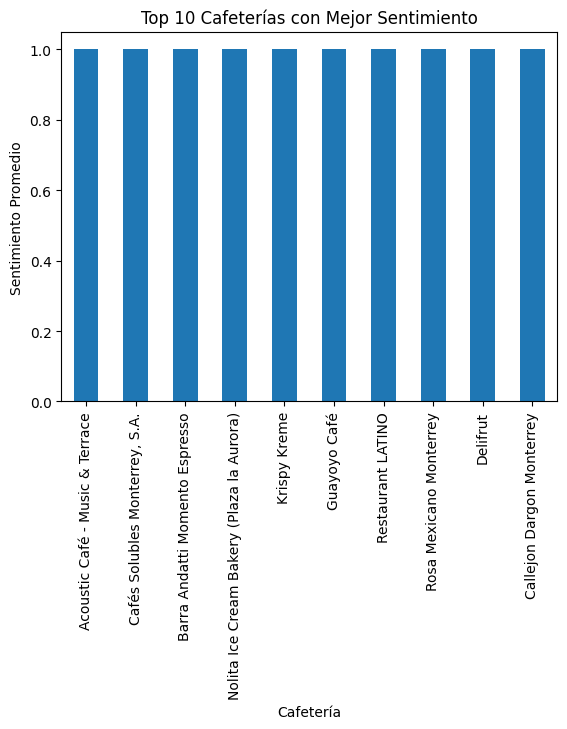

In [45]:
import matplotlib.pyplot as plt

# Graficar el top 10 de cafeterías con mejor sentimiento
top_cafeterias.head(10).plot(kind='bar', x='nombre_cafe', y='sentimiento_num', legend=False)
plt.title('Top 10 Cafeterías con Mejor Sentimiento')
plt.xlabel('Cafetería')
plt.ylabel('Sentimiento Promedio')
plt.xticks(rotation=90)
plt.show()

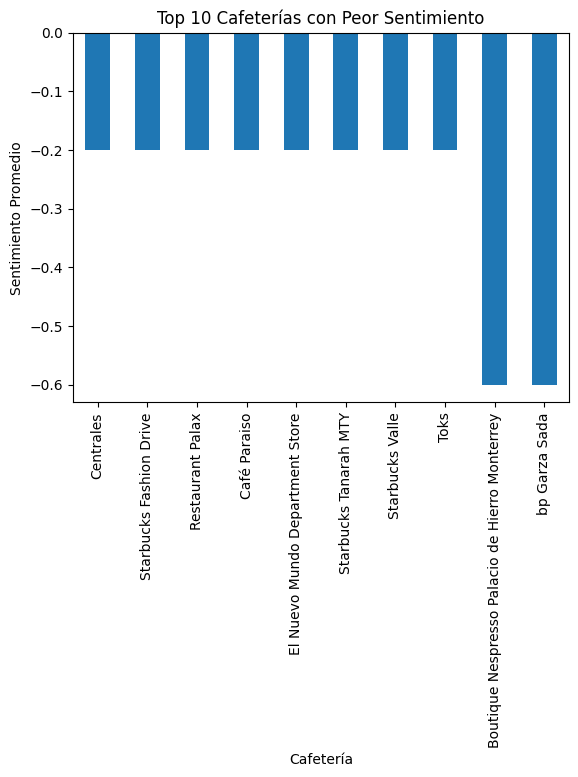

In [61]:
# Graficar el top 10 de cafeterías con peor sentimiento
top_cafeterias.tail(10).plot(kind='bar', x='nombre_cafe', y='sentimiento_num', legend=False)
plt.title('Top 10 Cafeterías con Peor Sentimiento')
plt.xlabel('Cafetería')
plt.ylabel('Sentimiento Promedio')
plt.xticks(rotation=90)
plt.show()

In [62]:
df.head()

,nombre_cafe,reseña,calificación,reseña_procesada,sentimiento,sentimiento_num
0,Starbucks Plaza Cumbres,"This sucursal is nice, currently the customer ...",5,sucursal nice currently customer service impro...,NEGATIVE,-1
1,Starbucks Plaza Cumbres,Great place to go after you take a walk in the...,4,great place go take walk mall shopping pretty ...,POSITIVE,1
2,Starbucks Plaza Cumbres,Nice little taste of home when I visited monte...,5,nice little taste home visited monterrey mucha...,POSITIVE,1
3,Starbucks Plaza Cumbres,"Nice service, nice beverages, slow Internet....",4,nice service nice beverage slow internet time ...,POSITIVE,1
4,Starbucks Plaza Cumbres,"It's a nice coffe shop, you can sit and read o...",4,nice coffe shop sit read talk friend really re...,POSITIVE,1


In [63]:
vectorizer = TfidfVectorizer()

# Transformar las reseñas en vectores TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['reseña_procesada'])

# Convertir la matriz a un DataFrame para ver las características
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar el DataFrame de TF-IDF
tfidf_df

,aa,able,absolutely,ac,acceptable,accesible,access,accommodate,accommodating,accompaniment,...,youll,young,younger,youre,yummy,yummytried,zero,zerocontact,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.0,0.0,0.0,0.0,0.0,0.0,0.245464,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# Sumar los valores TF-IDF por palabra (columna)
suma_tfidf = tfidf_df.sum(axis=0)

# Ordenar las palabras por la suma de TF-IDF de mayor a menor
palabras_importantes = suma_tfidf.sort_values(ascending=False)

# Ver las 10 palabras más importantes
palabras_importantes.head(5)

,0
good,17.563223
coffee,14.602787
great,13.165700
place,12.461417
service,11.793126


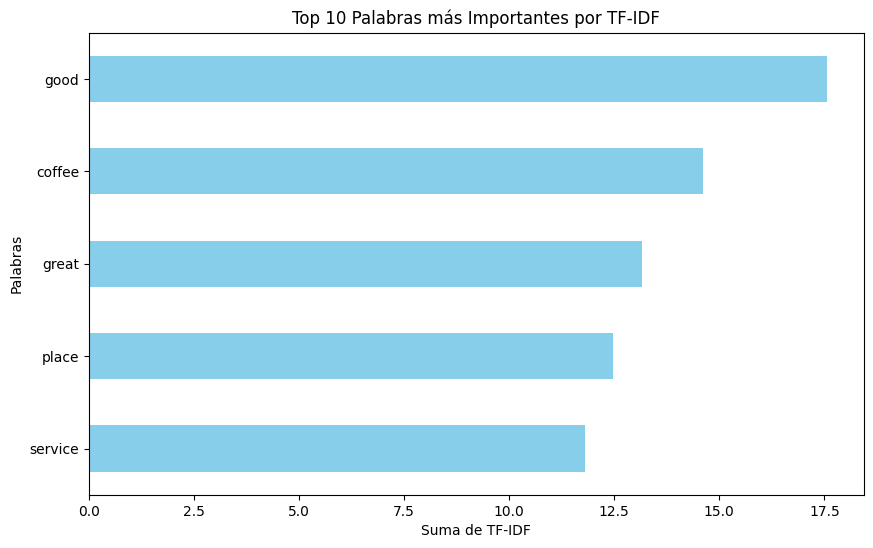

In [68]:
# Graficar las 10 palabras más importantes
palabras_importantes.head(5).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Suma de TF-IDF')
plt.ylabel('Palabras')
plt.title('Top 10 Palabras más Importantes por TF-IDF')
plt.gca().invert_yaxis()  # Para que la palabra más importante esté en la parte superior
plt.show()